### IMPORTACIONES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re #regex para validar si existe subfijos

### LECTURA DE ARCHIVOS

In [2]:


# Lee el archivo CSV
df = pd.read_csv('limpio.csv')

# Muestra las primeras filas del DataFrame para verificar
print(df.head())


   Ramanshift  collagen  collagen.1  collagen.2  collagen.3  collagen.4  \
0     1801.26     0.117       0.123       0.098       0.097       0.115   
1     1797.41     0.118       0.124       0.099       0.098       0.116   
2     1793.55     0.119       0.124       0.100       0.098       0.117   
3     1789.69     0.118       0.122       0.099       0.097       0.117   
4     1785.84     0.118       0.121       0.099       0.096       0.116   

   collagen.5  collagen.6  collagen.7  collagen.8  ...  DNA.100  DNA.101  \
0       0.129       0.130       0.144       0.129  ...    0.154    0.150   
1       0.130       0.131       0.145       0.129  ...    0.154    0.152   
2       0.131       0.132       0.145       0.130  ...    0.155    0.153   
3       0.131       0.132       0.146       0.131  ...    0.155    0.154   
4       0.130       0.131       0.146       0.131  ...    0.155    0.155   

   DNA.102  DNA.103  DNA.104  DNA.105  DNA.106  DNA.107  DNA.108  DNA.109  
0    0.154    0.

 ### Verificamos si se tiene los subfijos al leer el archivo

In [3]:
if any(re.search(r'\.\d+$', col) for col in df.columns):
    # Si hay columnas con sufijos, eliminarlos
    df.columns = [re.sub(r'\.\d+$', '', col) for col in df.columns]
    print("Se eliminaron los sufijos numéricos de los encabezados.")
# Muestra las primeras filas del DataFrame para verificar
print(df.head())

Se eliminaron los sufijos numéricos de los encabezados.
   Ramanshift  collagen  collagen  collagen  collagen  collagen  collagen  \
0     1801.26     0.117     0.123     0.098     0.097     0.115     0.129   
1     1797.41     0.118     0.124     0.099     0.098     0.116     0.130   
2     1793.55     0.119     0.124     0.100     0.098     0.117     0.131   
3     1789.69     0.118     0.122     0.099     0.097     0.117     0.131   
4     1785.84     0.118     0.121     0.099     0.096     0.116     0.130   

   collagen  collagen  collagen  ...    DNA    DNA    DNA    DNA    DNA  \
0     0.130     0.144     0.129  ...  0.154  0.150  0.154  0.164  0.157   
1     0.131     0.145     0.129  ...  0.154  0.152  0.155  0.164  0.158   
2     0.132     0.145     0.130  ...  0.155  0.153  0.156  0.165  0.160   
3     0.132     0.146     0.131  ...  0.155  0.154  0.157  0.165  0.160   
4     0.131     0.146     0.131  ...  0.155  0.155  0.157  0.166  0.160   

     DNA    DNA    DNA    DNA 

In [4]:
unique_headers = df.columns.unique()
print("\nEncabezados únicos:")
print(unique_headers)

# Identificar los tipos únicos de valores en los encabezados
unique_types = set(col for col in df.columns if col != "Ramanshift")


Encabezados únicos:
Index(['Ramanshift', 'collagen', 'glycogen', 'lipids', 'DNA'], dtype='object')


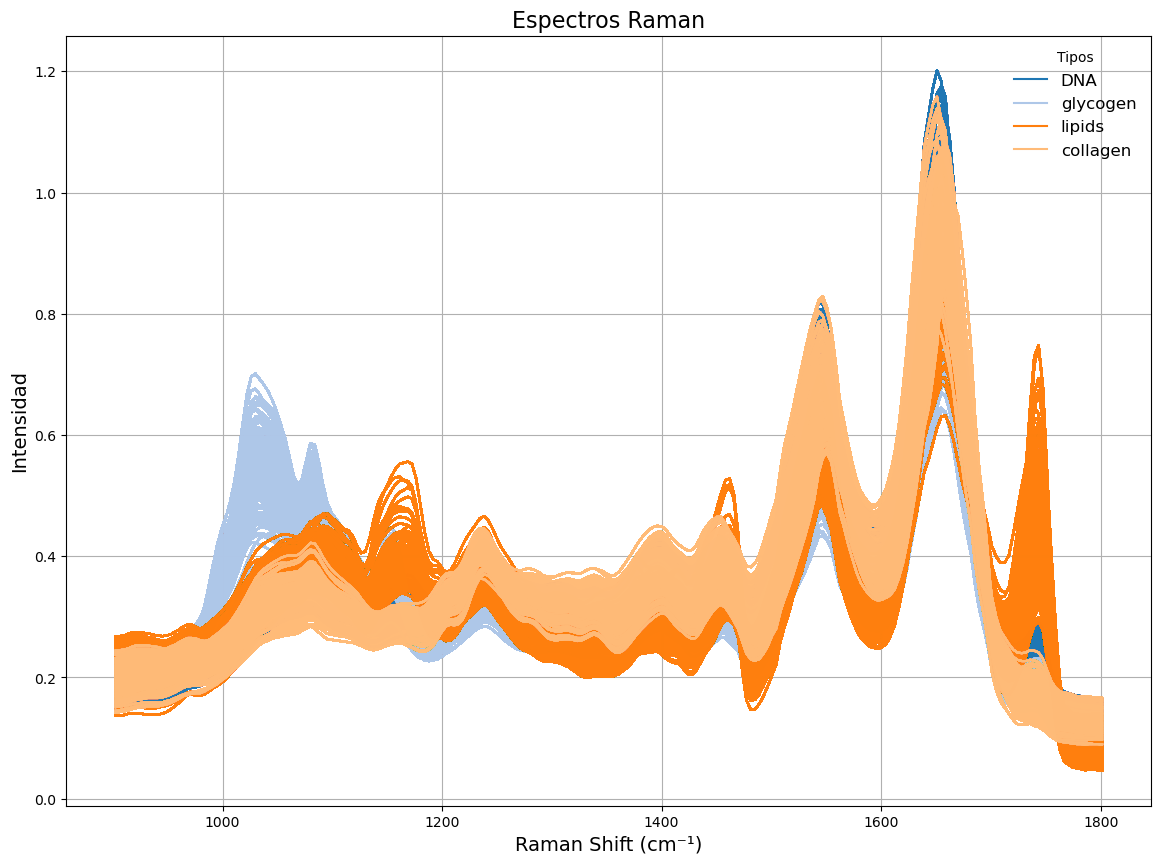

In [5]:
# Colores para cada tipo
colors = plt.cm.tab20.colors  # Una paleta de colores suficientemente grande
color_map = {unique: colors[i % len(colors)] for i, unique in enumerate(unique_types)}

# Graficar cada tipo una sola vez en la leyenda
plt.figure(figsize=(14, 10))

for unique_type in unique_types:
    # Filtrar las columnas correspondientes al tipo actual
    columns = [col for col in df.columns if col.startswith(unique_type)]
    
    # Graficar todas las columnas del tipo actual
    for col in columns:
        plt.plot(df['Ramanshift'], df[col], color=color_map[unique_type], alpha=0.6)
    
    # Agregar una entrada en la leyenda solo para el tipo (una vez)
    plt.plot([], [], label=unique_type, color=color_map[unique_type])  # Dummy plot for legend

# Etiquetas y leyendas
plt.title("Espectros Raman", fontsize=16)
plt.xlabel("Raman Shift (cm⁻¹)", fontsize=14)
plt.ylabel("Intensidad", fontsize=14)
plt.legend(title="Tipos", fontsize=12, loc='upper right', frameon=False)
plt.grid(True)

# Mostrar la gráfica
plt.show()

### En este caso pediremos al usuario ingresar algun tipo para graficar, para tener una idea de como se ve los espectros para cada uno de los tipos existentes en el archivo.

Ingrese el tipo de espectro para graficar (opciones: DNA, glycogen, lipids, collagen): DNA


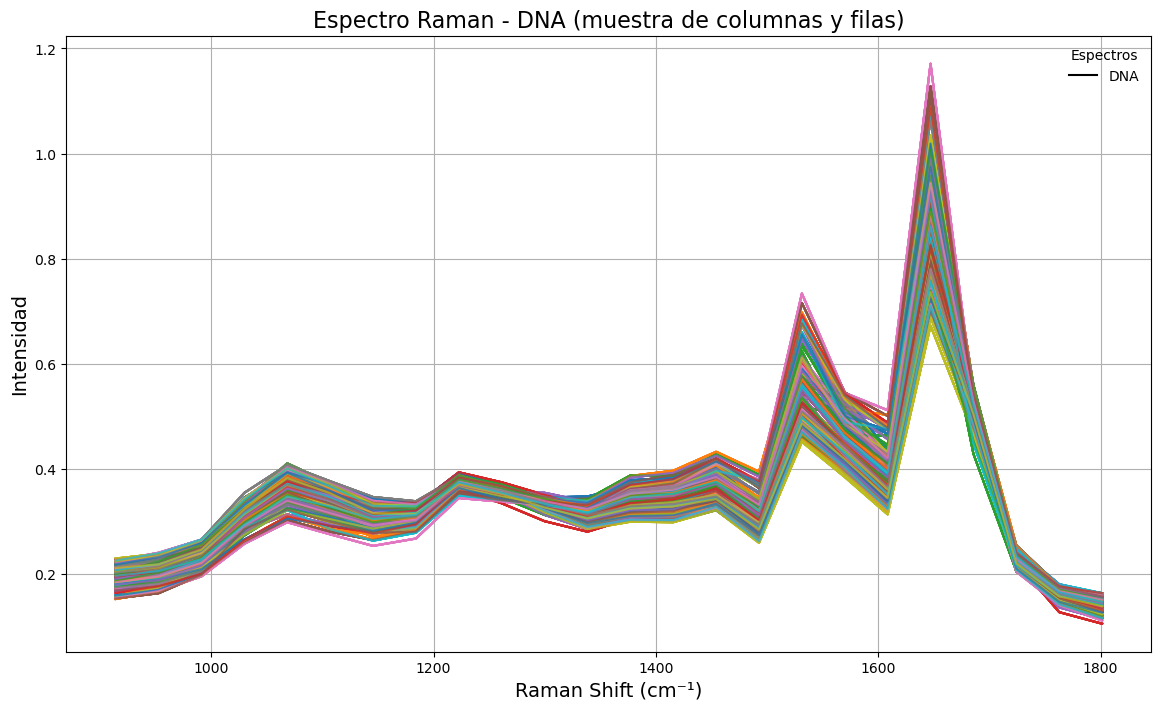

In [6]:
# Configurar el tipo de espectro que se desea graficar
tipo_espectro = input(f"Ingrese el tipo de espectro para graficar (opciones: {', '.join(unique_types)}): ").strip()

# Filtrar las columnas correspondientes al tipo de espectro ingresado
columnas_tipo = [col for col in df.columns if col.startswith(tipo_espectro)]

if columnas_tipo:
    # Limitar el número de columnas graficadas
    max_columns = 10
    columnas_tipo = columnas_tipo[:max_columns]

    # Reducir la cantidad de datos graficados
    sampled_df = df.iloc[::10, :]

    # Crear la gráfica
    plt.figure(figsize=(14, 8))

    # Graficar todas las líneas sin leyenda
    for col in columnas_tipo:
        plt.plot(sampled_df['Ramanshift'], sampled_df[col], alpha=0.7)

    # Añadir una entrada única en la leyenda para el tipo
    plt.plot([], [], label=tipo_espectro, color='black') 

    # Etiquetas y leyenda
    plt.title(f"Espectro Raman - {tipo_espectro} (muestra de columnas y filas)", fontsize=16)
    plt.xlabel("Raman Shift (cm⁻¹)", fontsize=14)
    plt.ylabel("Intensidad", fontsize=14)
    plt.legend(title="Espectros", fontsize=10, loc='upper right', frameon=False)
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()
else:
    print(f"No se encontraron columnas para el tipo de espectro '{tipo_espectro}'. Verifique el nombre e intente nuevamente.")
